<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session4/Assignment4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

This is basic model without any regularization,dropout and learning rate

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


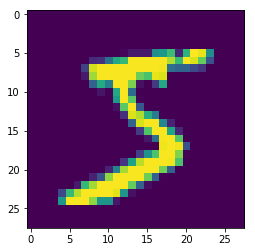

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(8,(3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(Conv2D(16,(3, 3), activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2))) #12
#model.add(Conv2D(8,(1, 1), activation='relu'))#12   

model.add(Conv2D(16,(3,3), activation='relu')) #10
model.add(Conv2D(32, (3, 3), activation='relu')) #8

model.add(MaxPooling2D(pool_size=(2, 2)))#4
#model.add(Conv2D(8,(1, 1), activation='relu'))#4

model.add(Conv2D(64,(3,3), activation='relu')) #2
model.add(Conv2D(10,(2,2)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 2, 2, 64)          18496     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1,validation_split=0.1)
#model.fit(X_train, Y_train,batch_size=128,nb_epoch=50,verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.3192 - acc: 0.9022 - val_loss: 0.0839 - val_acc: 0.9728
Epoch 2/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0815 - acc: 0.9753 - val_loss: 0.0537 - val_acc: 0.9840
Epoch 3/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0580 - acc: 0.9822 - val_loss: 0.0436 - val_acc: 0.9873
Epoch 4/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.0431 - acc: 0.9868 - val_loss: 0.0450 - val_acc: 0.9875
Epoch 5/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.0369 - acc: 0.9888 - val_loss: 0.0432 - val_acc: 0.9878
Epoch 6/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.0310 - acc: 0.9900 - val_loss: 0.0364 - val_acc: 0.9898
Epoch 7/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0300 - val_acc:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.027904392604647, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.72649570e-09 2.36209914e-08 9.01488477e-07 3.34345873e-06
  1.83164437e-14 3.16029043e-11 1.06512805e-16 9.99969959e-01
  4.06673850e-09 2.57364663e-05]
 [1.18517460e-10 1.58975642e-08 1.00000000e+00 7.01119718e-10
  3.45908003e-12 5.21442752e-13 2.22905704e-11 6.45643315e-13
  7.81171169e-11 3.71835910e-14]
 [8.12045926e-07 9.99764860e-01 5.96340033e-06 2.86348580e-07
  8.32035148e-05 2.80010681e-06 3.00653653e-07 1.35128779e-04
  1.76758726e-06 4.94523783e-06]
 [9.97727931e-01 1.83639996e-13 1.65052333e-10 1.30132627e-09
  5.07330896e-12 5.33038929e-08 2.27122940e-03 5.27286201e-12
  8.11966515e-07 5.74993664e-10]
 [6.34915037e-12 9.85929471e-09 2.21383328e-10 1.55099739e-10
  9.99988079e-01 2.94770292e-10 7.74700837e-09 4.45568693e-09
  3.75630584e-08 1.18798562e-05]
 [1.18475782e-07 9.99985337e-01 3.01561414e-07 3.40300926e-10
  2.44134935e-06 9.56997503e-09 4.48637527e-09 1.05723639e-05
  1.09452806e-07 1.03770208e-06]
 [2.11042473e-15 3.96005423e-10 7.81229387e-11 3.56443228e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
print (layer_dict['conv2d_83'].output)

Tensor("conv2d_83/Relu:0", shape=(?, 8, 8, 32), dtype=float32)


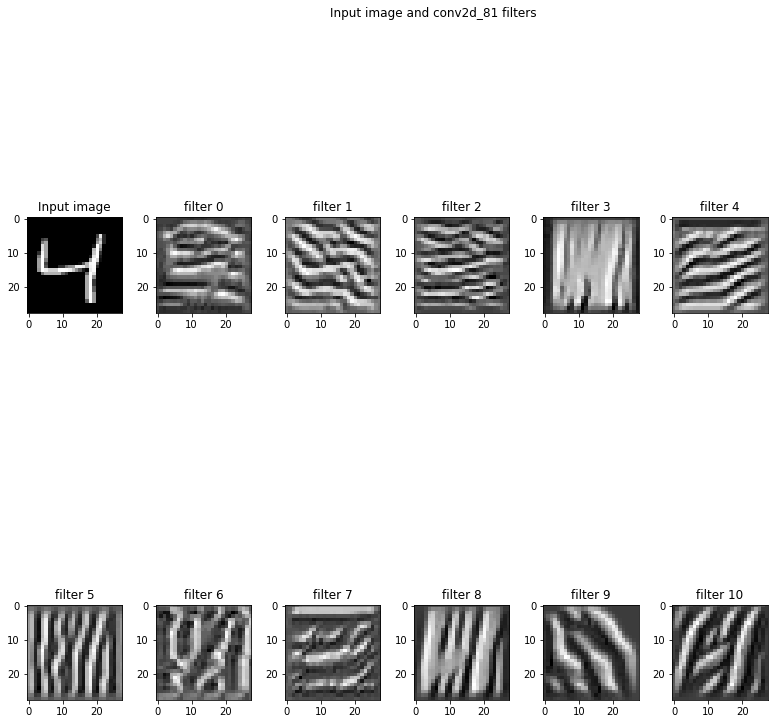

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_81'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()